02:48 bilby INFO    : Running for label 'firsttry', output will be saved to 'outdir'
02:48 bilby INFO    : Analysis priors:
02:48 bilby INFO    : mu=Uniform(minimum=0, maximum=5, name='mu', latex_label='mu', unit=None, boundary=None)
02:48 bilby INFO    : sigma=Uniform(minimum=0, maximum=10, name='sigma', latex_label='sigma', unit=None, boundary=None)
02:48 bilby INFO    : Analysis likelihood class: <class '__main__.MyFirstLikelihood'>
02:48 bilby INFO    : Analysis likelihood noise evidence: nan
02:48 bilby INFO    : Single likelihood evaluation took 1.672e-04 s
02:48 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
02:48 bilby INFO    : Checkpoint every check_point_delta_t = 600s
02:48 bilby WARNING : Using cached result
02:48 bilby INFO   

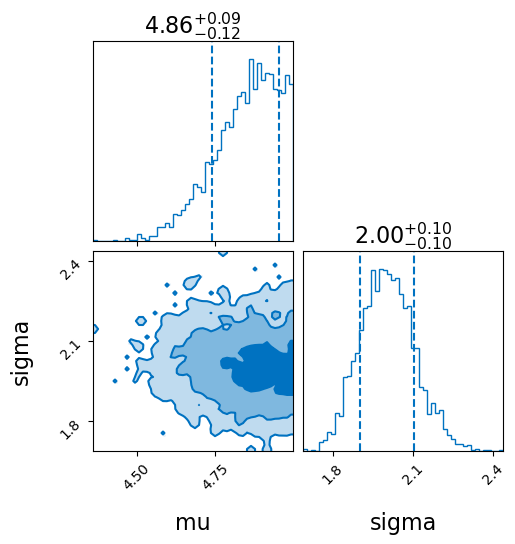

In [3]:
import bilby
import numpy as np
label = "firsttry"
outdir = "outdir"
data = np.random.normal(5, 2, 200)  #mean,spread,points

class MyFirstLikelihood(bilby.Likelihood):
    def __init__(self, data):
        super().__init__(parameters={"mu": None, "sigma": None})
        self.data = data #to store data and count my points
        self.N = len(data)

    def log_likelihood(self):
        #so we need to get current guesses
        mu = self.parameters["mu"]
        sigma = self.parameters["sigma"]
        #now here is the caclculation to find how well this guess works
        res = self.data - mu #diffrence between data and guess
        return -0.5 * (
            np.sum((res / sigma) ** 2) + self.N * np.log(2 * np.pi * sigma**2))
        #res= residuals smaller sum = better fit 
        #sigma**2 is variance bigger = more uncertainty
        #the whole log is to compress value so if in case sigma was large it doesnt explode
        #more data = stronger penalty for being uncertain
        #0.5 is to make the math cleaner
        #whole formula is two penalties added together for bad mu guesses and for bad sigma guesses 

#so I comment the whole code to write mine instead 
likelihood = MyFirstLikelihood(data)
priors = dict(
    mu=bilby.core.prior.Uniform(0, 5, "mu"),
    sigma=bilby.core.prior.Uniform(0, 10, "sigma"),
) #if i know it more closer i can make it narrow just to make the process of finding it quicker right?

result = bilby.run_sampler(
    likelihood=likelihood,  
    priors=priors,        
    sampler="dynesty",     
    nlive=1000,            # higher = more accurate but slower these are our live points
    outdir=outdir,         # where to save results
    label=label,           #i think i can also dont put this from the first part cause its basically a naming process
)
result.plot_corner()